In [14]:
import pandas as pd

import numpy as np

In [15]:
data = pd.read_csv('Advertising.csv')

In [16]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [17]:
data.corr(numeric_only=True)['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate realistic synthetic multivariate data
np.random.seed(42)
n = 100
hours = np.random.uniform(1, 10, n)
attendance = np.random.uniform(60, 100, n)
sleep = np.random.uniform(4, 9, n)

# Generate scores using a weighted equation with noise
score = 5 * hours + 0.3 * attendance + 1.5 * sleep + np.random.normal(0, 5, n)

# Create DataFrame
df = pd.DataFrame({
    'Hours_Studied': hours,
    'Attendance': attendance,
    'Sleep_Hours': sleep,
    'Score': score
})

# Train multivariate linear regression model
X = df[['Hours_Studied', 'Attendance', 'Sleep_Hours']]
y = df['Score']
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept (b):", model.intercept_)
print("Coefficients (m1, m2, m3):", model.coef_)

# Predict for a new student
sample = pd.DataFrame([[5, 90, 7]], columns=['Hours_Studied', 'Attendance', 'Sleep_Hours'])
predicted_score = model.predict(sample)
print("Predicted Score:", predicted_score[0])


Intercept (b): -5.1127267986439335
Coefficients (m1, m2, m3): [5.23107181 0.32606871 1.82934818]
Predicted Score: 63.19425385015782


Intercept (b): 14.100000000000001
Coefficients (m1, m2, m3): [3.76419618 2.79230665 0.05597551]
R² score: 0.899438024100912


c:\Users\abhij\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


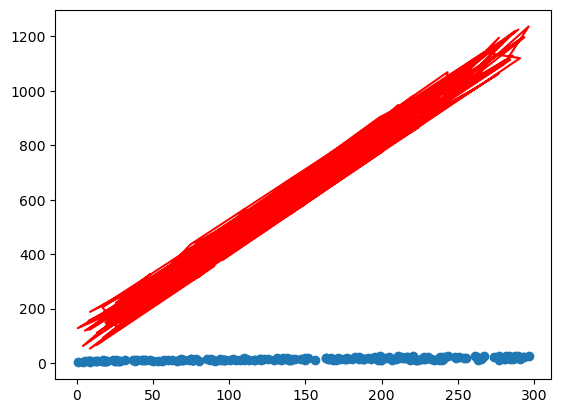

In [19]:
x = data[['TV', 'radio', 'newspaper']]
y = data['sales']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_scaled, y_train)

print("Intercept (b):", model.intercept_)
print("Coefficients (m1, m2, m3):", model.coef_)

from sklearn.metrics import r2_score
predictions = model.predict(x_scaled_test)
print("R² score:", r2_score(y_test, predictions))

import matplotlib.pyplot as plt
plt.scatter(data['TV'], y)
plt.plot(data['TV'], model.predict(x), color='red')


In [20]:
data = pd.read_csv('study.csv')
data = data.head(900)
print(data['Attendance_Hours'].corr(data['Final_Marks']))

0.8950790452168174


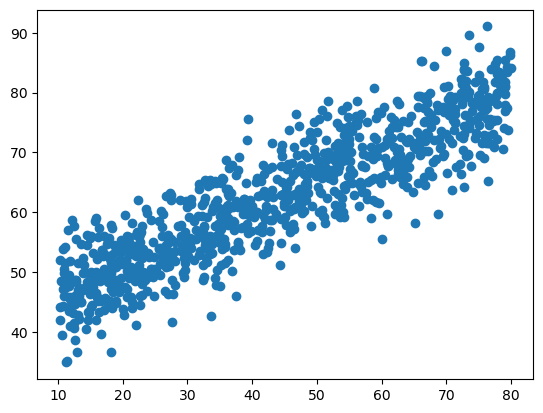

In [21]:
import matplotlib.pyplot as plt
plt.scatter(data['Attendance_Hours'], data['Final_Marks'])

In [22]:
def linear_regression(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].Attendance_Hours
        y = points.iloc[i].Final_Marks
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
        m = m_now - (L * m_gradient)
        b = b_now - (L * b_gradient)
    return m, b

m = 0
b = 0
L = 0.0001
for i in range(900):
    m, b = linear_regression(m, b, data, L)
print(m ,b)



1.2235587182015657 1.304691950497446


1.2235587182015657 1.304691950497446


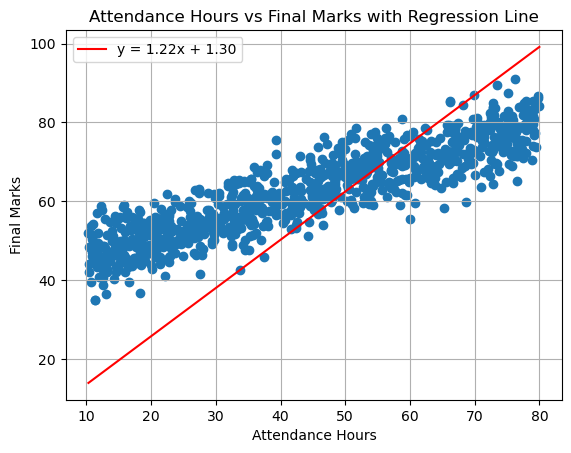

In [23]:
plt.scatter(data['Attendance_Hours'], data['Final_Marks'])

x_line = np.linspace(data['Attendance_Hours'].min(), data['Attendance_Hours'].max(), 100)

y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label=f"y = {m:.2f}x + {b:.2f}")
plt.legend()
plt.xlabel('Attendance Hours')
plt.ylabel('Final Marks')
plt.title('Attendance Hours vs Final Marks with Regression Line')
plt.grid(True)
print(m, b)

In [24]:
from sklearn.metrics import r2_score


y_true = data['Final_Marks']
x_vals = data['Attendance_Hours']
y_pred = m * x_vals + b
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)


R² Score: -1.4507956001072184


In [25]:
from sklearn.linear_model import LinearRegression

x = data[['Attendance_Hours']]
y = data['Final_Marks']
model = LinearRegression()
model.fit(x, y)

print("Intercept (b):", model.intercept_)
print("Coefficient (m):", model.coef_[0])

from sklearn.metrics import r2_score


y_true = data['Final_Marks']
x_vals = data['Attendance_Hours']
y_pred = m * x_vals + b
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)


Intercept (b): 41.14683222412859
Coefficient (m): 0.4851444359331348
R² Score: -1.4507956001072184
